In [22]:
%matplotlib inline 
# con inline se pone show al final, en el caso de poner notebook no hace falta el show
import matplotlib.pyplot as plt #importar biblioteca y renombrarla a plt
import numpy as np
from scipy import integrate
import time

def integra_mcVect(fun, a, b, num_puntos=10000):
        plt.xlim(a-0.1,b+0.1)
        tic = time.time()
        randox = np.arange(a,b,(b-a)/num_puntos)
        alt = max(fun(randox))
        longi = len(randox)
        plt.ylim(0-0.1,alt+0.1)
        randoy = np.random.uniform(low=0.0, high=alt, size=(longi))
        #calculamos porcentaje viendo cuantos puntos(x,y) tienen la "y" menor que la 
        Y = fun(randox)
        numTotalAcertados = np.sum(Y < randoy)
        integral = (numTotalAcertados / num_puntos) * (b-a)* alt
        toc = time.time()
        print("La integral de la función sin iteraciones es : " + str(integral))
        #pintamos puntos
        plt.plot(randox,randoy,'x')
        #pintamos funcion
        plt.plot(randox,Y)
        plt.show()
        a=1000*(toc-tic)
        return a

In [37]:
def integra_mcBucles(fun, a, b, num_puntos=10000):
    plt.xlim(a-0.1,b+0.1) #limite del eje X
    tic = time.time() #guardamos la hora actual
    randox=[]
    randoy=[]
    i=a
    incremento = (b - a)/num_puntos
    while(i < b):
        x = i + incremento
        randox.append(x)
        i = x
    alt = max(fun(randox))
    i=0
    while( i != len(randox) ): #en cada vuelta de bucle añado un punto, miro a ver si está por debajo de la funcion, miro sies el más alto
        y = (alt - a) * np.random.random_sample() + a
        randoy.append(y)
        i = i+1
    #calculamos porcentaje viendo cuantos puntos(x,y) tienen la "y" menor que la 
    
    plt.ylim(0-0.1,alt+0.1)
    Y = fun(randox)
    numTotalAcertados = np.sum(Y < randoy)
    integral = (numTotalAcertados / num_puntos) * (b-a)* alt
    toc = time.time()
    print("La integral de la función con iteraciones es : " + str(integral))
    #pintamos puntos
    plt.plot(randox,randoy,'x')
    #pintamos funcion
    plt.plot(randox,Y)
    plt.show()
    b = 1000*(toc-tic)
    return b

In [42]:
def integra_mc(fun, a, b, num_puntos=10000):
    tiempo_vec = integra_mcVect(fun,a,b)
    tiempo_buc = integra_mcBucles(fun,a, b)
    x = np.arange(2)
    tiempos = [tiempo_vec,tiempo_buc]
    plt.bar(x,tiempos,width = 0.7)
    plt.xticks(x, ('TiempoVectores', 'TiempoBucles'))
    plt.ylabel("Milisegundos")
   
    plt.show()
   

La integral de la función sin iteraciones es : 1.1281459219040946


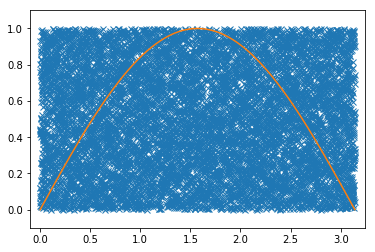

La integral de la función con iteraciones es : 1.121234418066197


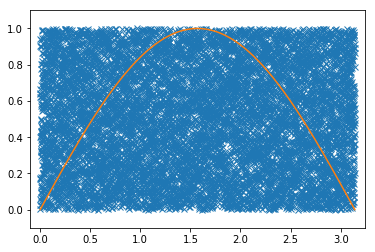

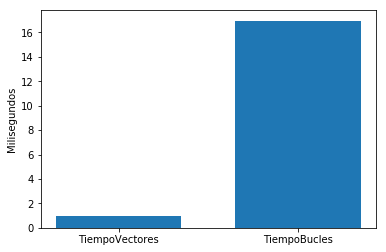

In [43]:

integra_mc(np.sin,0,np.pi)
